# Die Einkommensverteilung in der Schweiz

Wie den bei Aymo Brunetti, Volkswirtschaftslehre: Lehrmittel
für die Sekundarstufe II und die Weiterbildung, 15. Auflage, Bern 2023,
Seite 102, dargestellten Daten des Staatssekretariats für Wirtschaft
(seco) entnommen werden kann, wird mehr als die Hälfte des BIP als
Arbeitserwerb verteilt.

Im folgenden soll darüber nachgedacht werden, wie gerecht diese
Erwerbseinkommen verteilt werden.

Gerechtigkeit wird immer wieder mit Gleichheit in Verbindung gebracht.

Eine absolute Gleichheit verursacht allerdings auch Ungerechtigkeiten.

![Chancengleichheit](gerechtigkeit.jpg)
*https://www.walterherzog.ch/cartoons/chancengleichheit/ besucht am 3.12.23*

Das Schweizerische Bundesgericht hat daher einen differenzierten
Gleichheitsbegriff entwickelt:

>Gleiches soll nach Massgabe seiner Gleichheit gleich und ungleiches
>nach Massgabe seiner Ungleichheit ungleich behandelt werden.

## Mass für die Gleichverteilung (des Einkommens)

Als Massstab für die Messung der Gleichverteilung des Einkommens hat
sich der Gini-Koeffizient etabliert. Der Gini-Koeffizient baut auf der
Lorenzkurve auf.

Die Lorenzkurve stellt den prozentualen Anteil der Erwerbstätigen dem
prozentualen Anteil der Einkommen gegenüber.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

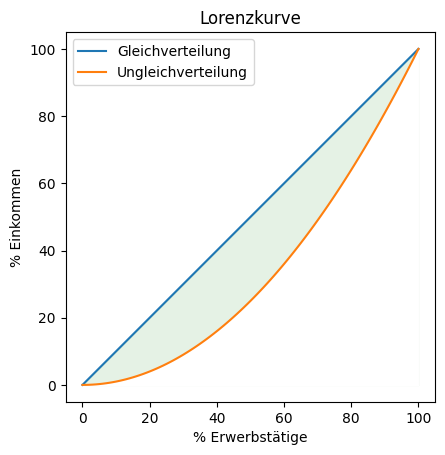

In [2]:
x = [i for i in range(0,101)]
g = x
u = [0.01 * e ** 2 for e in x]

fig, ax = plt.subplots()
ax.plot(x,g, label="Gleichverteilung")
ax.plot(x,u, label="Ungleichverteilung")
plt.title("Lorenzkurve")
plt.ylabel("% Einkommen")
plt.xlabel("% Erwerbstätige")
plt.legend()
ax.fill_between(g,x, color="green", alpha=0.1)
ax.fill_between(g,u, color="white")
ax.set_aspect('equal')
plt.show()

Wenn jeder Erwerbstätige genau gleich viel verdient dann verdienen 10%
der Erwerbstätigen 10% aller Einkommen. Dies führt zu einer Geraden (im
Diagramm blau dargestellt).

In Wirklichkeit verdienen nicht alle Erwerbstätigen gleich viel. Die
ersten 10% der Erwerbstätigen verdienen im Bild nur gerade 1% aller
Einkommen. Dies führt zu einem "Durchhängen" der Lorenzkurve.

Der Gini-Koeffizient ist das Verhältnis der Fläche zwischen der Kurve
der Gleichverteilung sowie der realen Lorenzkurve (blassgrüne Fläche) und der Fläche des
Dreiecks bestehend aus x-Achse, y-Achse und Kurve der Gleichverteilung.
$$ G = \frac{A_g}{A_\Delta} $$

Je Kleiner der Gini-Koeffizient ist, dest näher an der Gleichverteilung
ist die Einkommensverteilung.

## Einkommensverteilung in der Schweiz

Gemäss Bundesamt für Statistik gib es in der Schweiz 4.713 Mio
Erwerbstätige<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1).
Diese Tragen mit Ihren Löhnen 58.6% zum BIP bei. Das BIP der Schweiz lag
2022 CHF 781.46 Mia<a
name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2). Damit ist das
Total der Erwerbseinkommen bei CHF 457.936 Mia.

Das Bundesamt für Statistik veröffentlichte darüber hinaus folgende
Tabelle (Auszug):


|  Einkommen                               | Anteil (in %) |
| :--- | ---: |
|  Unentgeltlich	                         | 0.6   |
|  Bis 26'000 Franken pro Jahr	           | 12.9   |
|  von 26'001 bis 52'000 Franken pro Jahr	 | 15.4   |
|  von 52'001 bis 78'000 Franken pro Jahr	 | 25.8   |
|  von 78'001 bis 104'000 Franken pro Jahr | 17.7   |
|  104'001 Franken pro Jahr oder mehr	     | 17.5   |
|  Keine Angabe / Weiss nicht	             | 10.1 |
 


In [11]:
erwerbstaetige = 4_713_000
anteile = [2.283, 14.583, 17.083, 27.483, 19.383, 19.183]
df = pd.DataFrame(anteile, columns=['anteile'])
df['mittel'] = [0, 13_000, 39_000, 75_000, 91_000, 200_000]
df['einkommen_kum'] = (erwerbstaetige / 100 * df['anteile']) * df['mittel']

print(df.to_string())

   anteile  mittel  einkommen_kum
0    2.283       0   0.000000e+00
1   14.583   13000   8.934858e+09
2   17.083   39000   3.139975e+10
3   27.483   75000   9.714553e+10
4   19.383   91000   8.313039e+10
5   19.183  200000   1.808190e+11


In [18]:
addierte_einkommen = [0]
i = 1

while i < len(df['anteile']-1):
    addierte_einkommen.append(addierte_einkommen[i-1]+df['einkommen_kum'][i])
    i += 1
    
print(addierte_einkommen)

df["einkommen_add"] = addierte_einkommen



[0, 8934858270.0, 40334608080.0, 137480142330.0, 220610534220.0, 401429492220.0]


In [15]:
addierte_prozente = [2.238]
i = 1

while i < len(df['anteile']-1):
    addierte_prozente.append(addierte_prozente[i-1]+df['anteile'][i])
    i += 1
    
print(addierte_prozente)
    
df["anteile_add"] = addierte_prozente

[2.238, 16.821, 33.903999999999996, 61.387, 80.77, 99.953]


In [25]:
df['rel_einkommensanteil'] = df['einkommen_add'] / 457_936_000_000 * 100
print(df.to_string)

<bound method DataFrame.to_string of    anteile  mittel  einkommen_kum  einkommen_add  anteile_add  \
0    2.283       0   0.000000e+00   0.000000e+00        2.238   
1   14.583   13000   8.934858e+09   8.934858e+09       16.821   
2   17.083   39000   3.139975e+10   4.033461e+10       33.904   
3   27.483   75000   9.714553e+10   1.374801e+11       61.387   
4   19.383   91000   8.313039e+10   2.206105e+11       80.770   
5   19.183  200000   1.808190e+11   4.014295e+11       99.953   

   rel_einkommensanteil  
0              0.000000  
1              1.951115  
2              8.807914  
3             30.021693  
4             48.174971  
5             87.660610  >


<Axes: xlabel='anteile_add'>

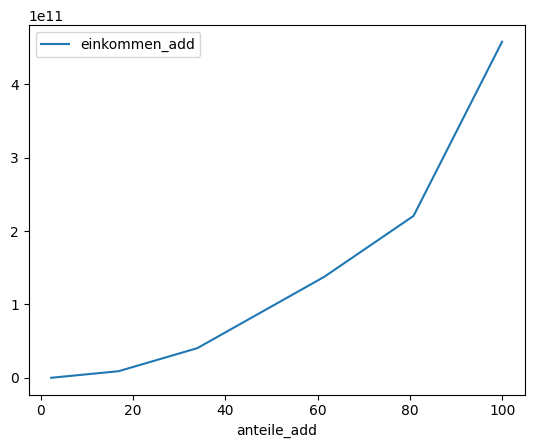

In [16]:
df.plot(x='anteile_add', y='einkommen_add', kind='line')

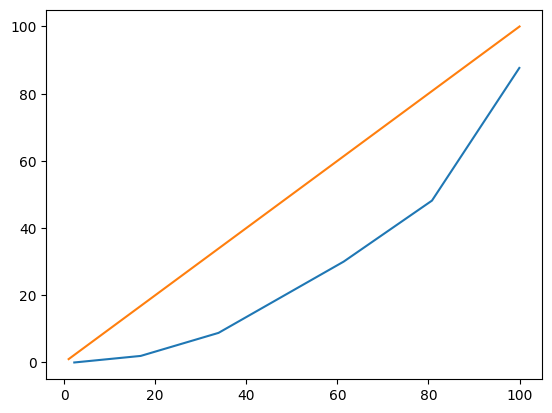

In [28]:
x = [i for i in range(1,101)]
y = x

fig2, ax2 = plt.subplots()
ax2.plot(df['anteile_add'], df['rel_einkommensanteil'])
ax2.plot(x, y)
plt.show()

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = np.array(list[df['anteile_add']]).reshape(-1,1)
y = np.array(list[df['rel_einkommensanteil']])

In [32]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [33]:
transformer.fit(x) 

TypeError: float() argument must be a string or a real number, not 'types.GenericAlias'

<a name="cite_note-1"></a>[<sup>[1]</sup>](#cite_ref-1)
https://www.bfs.admin.ch/bfs/de/home/statistiken/arbeit-erwerb/erwerbstaetigkeit-arbeitszeit.html
besucht am 3.12.23

<a name="cite_note-2"></a>[<sup>[2]</sup>](#cite_ref-2) seco,
https://www.seco.admin.ch/seco/de/home/wirtschaftslage---wirtschaftspolitik/Wirtschaftslage/bip-quartalsschaetzungen-/daten.html
besucht am 2.12.23